In [199]:
import glob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import r2_score

from tqdm import tqdm

tqdm.pandas()

In [200]:
mpl.rcParams['figure.dpi'] = 120

In [201]:
data_base_dir = "data/by_date"

dates = []
dfs = {}
for fpath in glob.glob(data_base_dir + "/*"):
    df = pd.read_csv(fpath)
    date = df["date"].iloc[0]
    dfs[date] = df  # [df["question"].notnull()]
    dates.append(date)

dates.sort()

In [202]:
df = pd.concat(dfs)
df

speaker  \
1984-10-07 0    Dorothy Ridings   
           1    Barbara Walters   
           2     James Wieghart   
           3     James Wieghart   
           4     James Wieghart   
...                         ...   
2004-09-30 137       Jim Lehrer   
           138       John Kerry   
           139       Jim Lehrer   
           140   George W. Bush   
           141       Jim Lehrer   

                                                             text  type  \
1984-10-07 0    Good evening from the Kentucky Center for the ...  Pres   
           1    Thank you, Dorothy. A few words as we begin to...  Pres   
           2    Mr. President, in 1980 you promised the Americ...  Pres   
           3    Mr. President, the Congressional Budget Office...  Pres   
           4    Mr. Mondale, the Carter- Mondale administratio...  Pres   
...                                                           ...   ...   
2004-09-30 137  All right, that brings us to closing statement...  Pres   
           138  Thank you, Jim, very much. Thank you very much...  Pres   
           139                        Mr. President, two minutes.  Pres   
           140  Thank you very much tonight, Jim. Senator. If ...  Pres   
           141  And that ends tonights debate. A reminder, the...  Pres   

                election_year        date  candidate  qud question  \
1984-10-07 0             1984  1984-10-07          0  NaN      NaN   
           1             1984  1984-10-07          0  NaN      NaN   
           2             1984  1984-10-07          0  NaN      NaN   
           3             1984  1984-10-07          0  NaN      NaN   
           4             1984  1984-10-07          0  NaN      NaN   
...                       ...         ...        ...  ...      ...   
2004-09-30 137           2004  2004-09-30          0  NaN      NaN   
           138           2004  2004-09-30          1  NaN      NaN   
           139           2004  2004-09-30          0  NaN      NaN   
           140           2004  2004-09-30          1  NaN      NaN   
           141           2004  2004-09-30          0  NaN      NaN   

                similarity_cls  similarity_max  similarity_mean  \
1984-10-07 0               NaN             NaN              NaN   
           1               NaN             NaN              NaN   
           2               NaN             NaN              NaN   
           3               NaN             NaN              NaN   
           4               NaN             NaN              NaN   
...                        ...             ...              ...   
2004-09-30 137             NaN             NaN              NaN   
           138             NaN             NaN              NaN   
           139             NaN             NaN              NaN   
           140             NaN             NaN              NaN   
           141             NaN             NaN              NaN   

                similarity_sbert       party question_clean  qud_answer_fit  \
1984-10-07 0                 NaN   Moderator            NaN             NaN   
           1                 NaN   Moderator            NaN             NaN   
           2                 NaN   Moderator            NaN             NaN   
           3                 NaN   Moderator            NaN             NaN   
           4                 NaN   Moderator            NaN             NaN   
...                          ...         ...            ...             ...   
2004-09-30 137               NaN   Moderator            NaN             NaN   
           138               NaN  Democratic            NaN             NaN   
           139               NaN   Moderator            NaN             NaN   
           140               NaN  Republican            NaN             NaN   
           141               NaN   Moderator            NaN             NaN   

                qud_question_fit  
1984-10-07 0                 NaN  
           1                 NaN  
  

In [203]:
df_filtered = df[df["question"].notnull()]

In [204]:
for i, d in enumerate(dates):
    print(f"{i}\t{d}\t{len(dfs[d])}\t{len(dfs[d].columns)}")

0	1960-09-26	68	16
1	1976-09-23	94	16
2	1980-09-21	76	16
3	1984-10-07	134	16
4	1988-09-25	161	16
5	1992-10-11	92	16
6	1996-10-06	144	16
7	2000-10-03	166	16
8	2004-09-30	142	16
9	2008-09-26	189	16
10	2012-10-03	210	16
11	2016-09-26	308	16
12	2020-09-29	932	16


In [205]:
for i, d in enumerate(dates):
    df_f = dfs[d][dfs[d]["question"].notnull()]
    print(f"{i}\t{d}\t{len(df_f)}\t{len(df_f.columns)}")

0	1960-09-26	10	16
1	1976-09-23	20	16
2	1980-09-21	12	16
3	1984-10-07	30	16
4	1988-09-25	23	16
5	1992-10-11	11	16
6	1996-10-06	21	16
7	2000-10-03	26	16
8	2004-09-30	18	16
9	2008-09-26	17	16
10	2012-10-03	25	16
11	2016-09-26	19	16
12	2020-09-29	39	16


In [206]:
debate_lenghts = df.groupby("date").size()
debate_lenghts_f = df_filtered.groupby("date").size()
debate_ratios = debate_lenghts_f / debate_lenghts
debate_lenghts, debate_lenghts_f, debate_ratios

(date
 1960-09-26     68
 1976-09-23     94
 1980-09-21     76
 1984-10-07    134
 1988-09-25    161
 1992-10-11     92
 1996-10-06    144
 2000-10-03    166
 2004-09-30    142
 2008-09-26    189
 2012-10-03    210
 2016-09-26    308
 2020-09-29    932
 dtype: int64,
 date
 1960-09-26    10
 1976-09-23    20
 1980-09-21    12
 1984-10-07    30
 1988-09-25    23
 1992-10-11    11
 1996-10-06    21
 2000-10-03    26
 2004-09-30    18
 2008-09-26    17
 2012-10-03    25
 2016-09-26    19
 2020-09-29    39
 dtype: int64,
 date
 1960-09-26    0.147059
 1976-09-23    0.212766
 1980-09-21    0.157895
 1984-10-07    0.223881
 1988-09-25    0.142857
 1992-10-11    0.119565
 1996-10-06    0.145833
 2000-10-03    0.156627
 2004-09-30    0.126761
 2008-09-26    0.089947
 2012-10-03    0.119048
 2016-09-26    0.061688
 2020-09-29    0.041845
 dtype: float64)

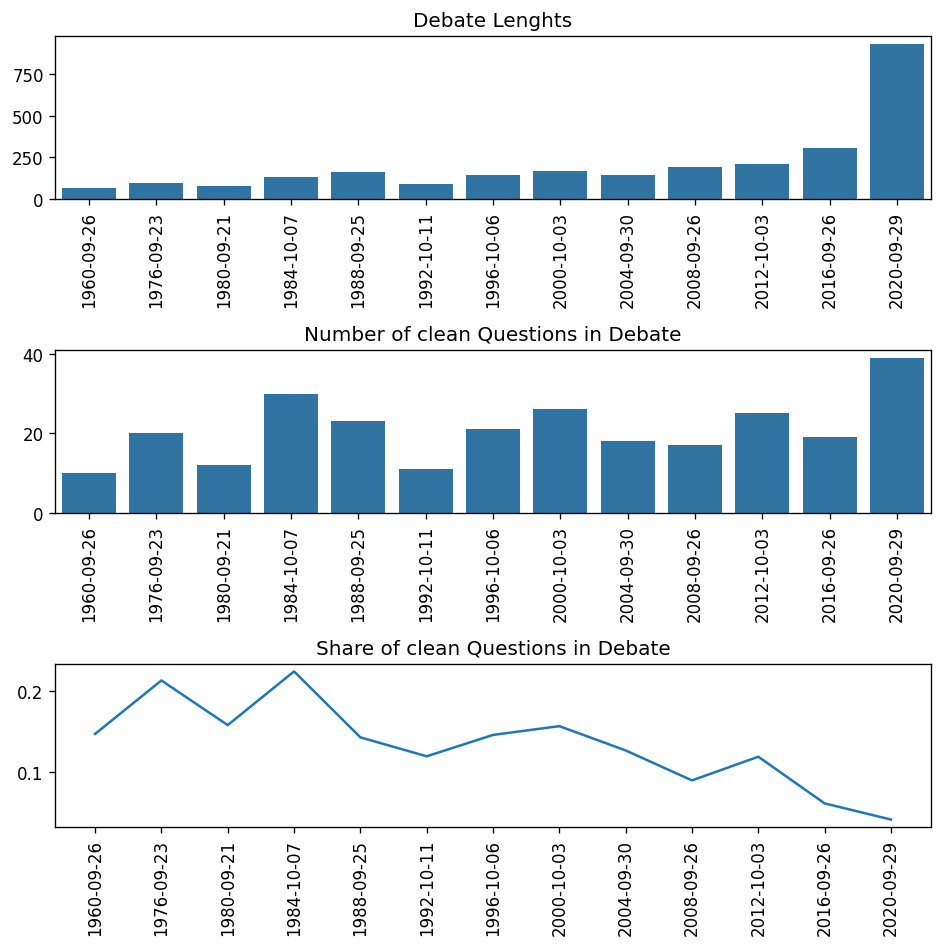

In [207]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

sns.barplot(data=debate_lenghts, ax=axs[0]).set_title("Debate Lenghts")
axs[0].set_xlabel(None)
sns.barplot(data=debate_lenghts_f, ax=axs[1]).set_title("Number of clean Questions in Debate")
axs[1].set_xlabel(None)
sns.lineplot(data=debate_ratios, ax=axs[2]).set_title("Share of clean Questions in Debate")
axs[2].set_xlabel(None)

for ax in axs:
    ax.tick_params(axis='x', rotation=90)
    
fig.tight_layout()

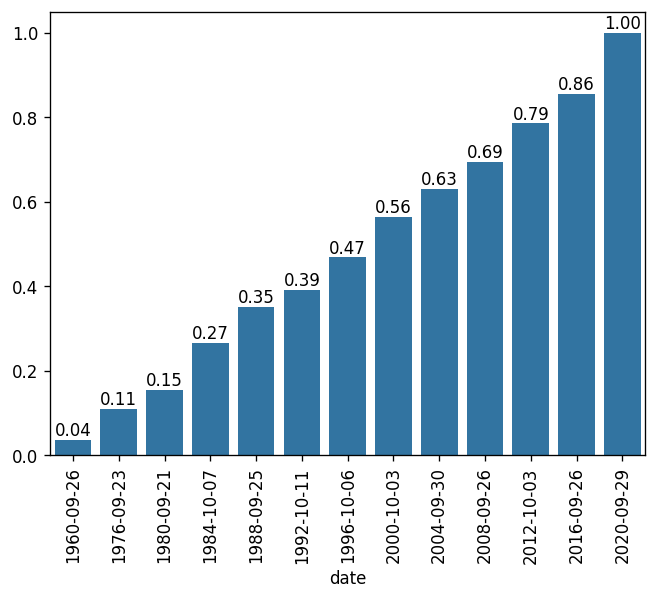

In [208]:
ax = sns.barplot(debate_lenghts_f.cumsum() / debate_lenghts_f.sum())
ax.tick_params(axis='x', rotation=90)
_ = ax.bar_label(ax.containers[0], fmt='%.2f')

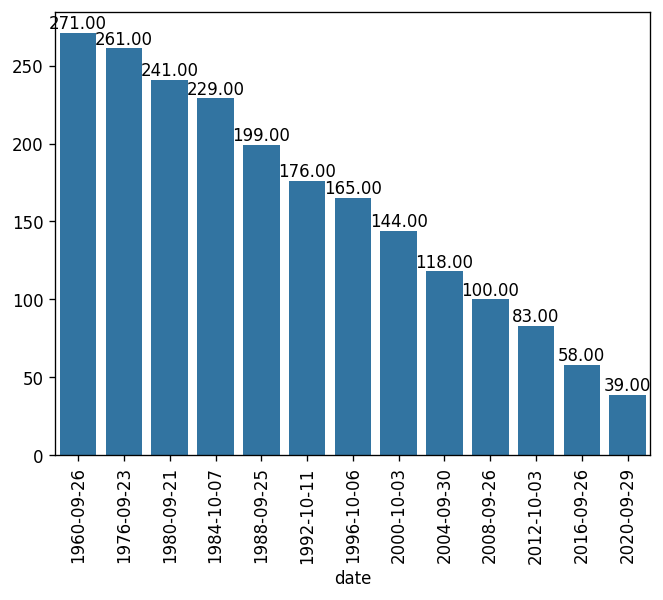

In [209]:
#sns.barplot(debate_lenghts_f)
ax = sns.barplot(debate_lenghts_f[::-1].cumsum()[::-1])
ax.tick_params(axis='x', rotation=90)
_ = ax.bar_label(ax.containers[0], fmt='%.2f')

In [210]:
df_melted = pd.melt(
    df,
    id_vars=[
        col
        for col in df.columns
        if col
        not in [
            "similarity_cls",
            "similarity_mean",
            "similarity_max",
            "similarity_sbert",
        ]
    ],
    var_name="measure",
    value_name="similarity",
)
df_melted

,speaker,text,type,election_year,date,candidate,qud,question,party,question_clean,qud_answer_fit,qud_question_fit,measure,similarity
0,Dorothy Ridings,Good evening from the Kentucky Center for the ...,Pres,1984,1984-10-07,0,NaN,NaN,Moderator,NaN,NaN,NaN,similarity_cls,NaN
1,Barbara Walters,"Thank you, Dorothy. A few words as we begin to...",Pres,1984,1984-10-07,0,NaN,NaN,Moderator,NaN,NaN,NaN,similarity_cls,NaN
2,James Wieghart,"Mr. President, in 1980 you promised the Americ...",Pres,1984,1984-10-07,0,NaN,NaN,Moderator,NaN,NaN,NaN,similarity_cls,NaN
3,James Wieghart,"Mr. President, the Congressional Budget Office...",Pres,1984,1984-10-07,0,NaN,NaN,Moderator,NaN,NaN,NaN,similarity_cls,NaN
4,James Wieghart,"Mr. Mondale, the Carter- Mondale administratio...",Pres,1984,1984-10-07,0,NaN,NaN,Moderator,NaN,NaN,NaN,similarity_cls,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,Jim Lehrer,"All right, that brings us to closing statement...",Pres,2004,2004-09-30,0,NaN,NaN,Moderator,NaN,NaN,NaN,similarity_sbert,NaN
10860,John Kerry,"Thank you, Jim, very much. Thank you very much...",Pres,2004,2004-09-30,1,NaN,NaN,Democratic,NaN,NaN,NaN,similarity_sbert,NaN
10861,Jim Lehrer,"Mr. President, two minutes.",Pres,2004,2004-09-30,0,NaN,NaN,Moderator,NaN,NaN,NaN,similarity_sbert,NaN
10862,George W. Bush,"Thank you very much tonight, Jim. Senator. If ...",Pres,2004,2004-09-30,1,NaN,NaN,Republican,NaN,NaN,NaN,similarity_sbert,NaN


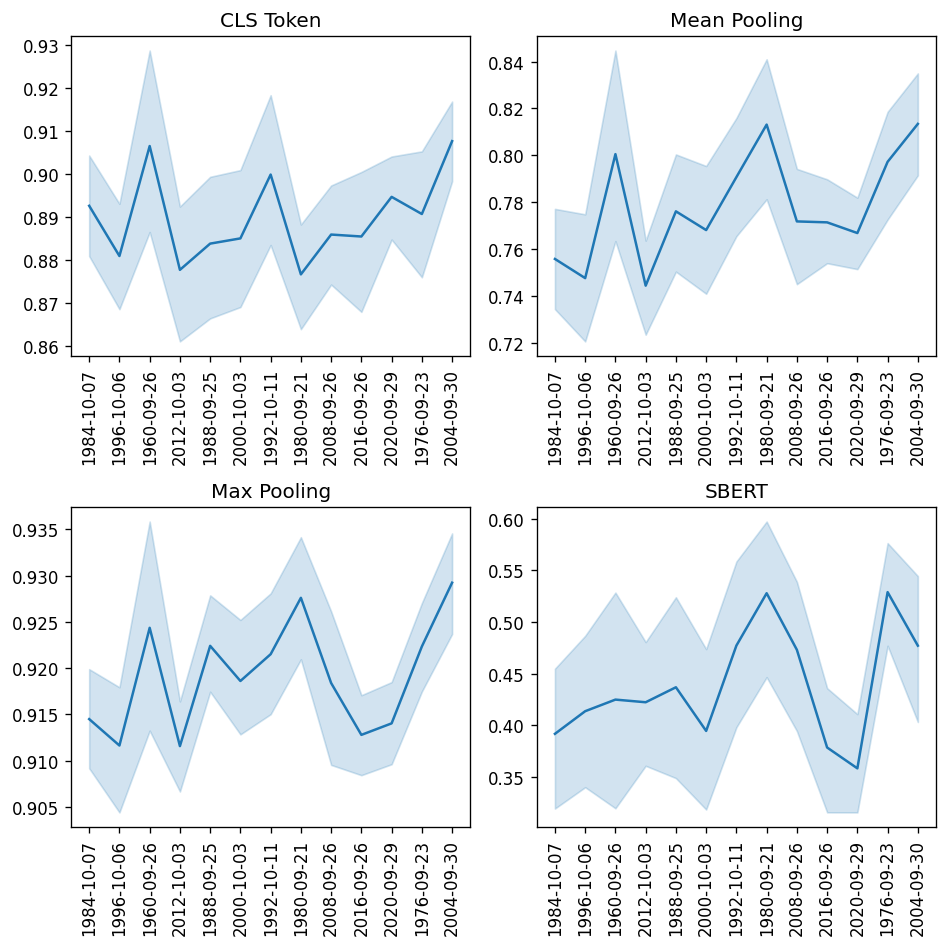

In [211]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.lineplot(data=df, x="date", y="similarity_cls", ax=axs[0, 0]).set_title("CLS Token")
axs[0, 0].set_xlabel(None)
axs[0, 0].set_ylabel(None)
sns.lineplot(data=df, x="date", y="similarity_mean", ax=axs[0, 1]).set_title("Mean Pooling")
axs[0, 1].set_xlabel(None)
axs[0, 1].set_ylabel(None)
sns.lineplot(data=df, x="date", y="similarity_max", ax=axs[1, 0]).set_title("Max Pooling")
axs[1, 0].set_xlabel(None)
axs[1, 0].set_ylabel(None)
sns.lineplot(data=df, x="date", y="similarity_sbert", ax=axs[1, 1]).set_title("SBERT")
axs[1, 1].set_xlabel(None)
axs[1, 1].set_ylabel(None)

for ax in axs:
    for a in ax:
        a.tick_params(axis='x', rotation=90)

# fig.suptitle('Embedding Similarity') 
fig.tight_layout()

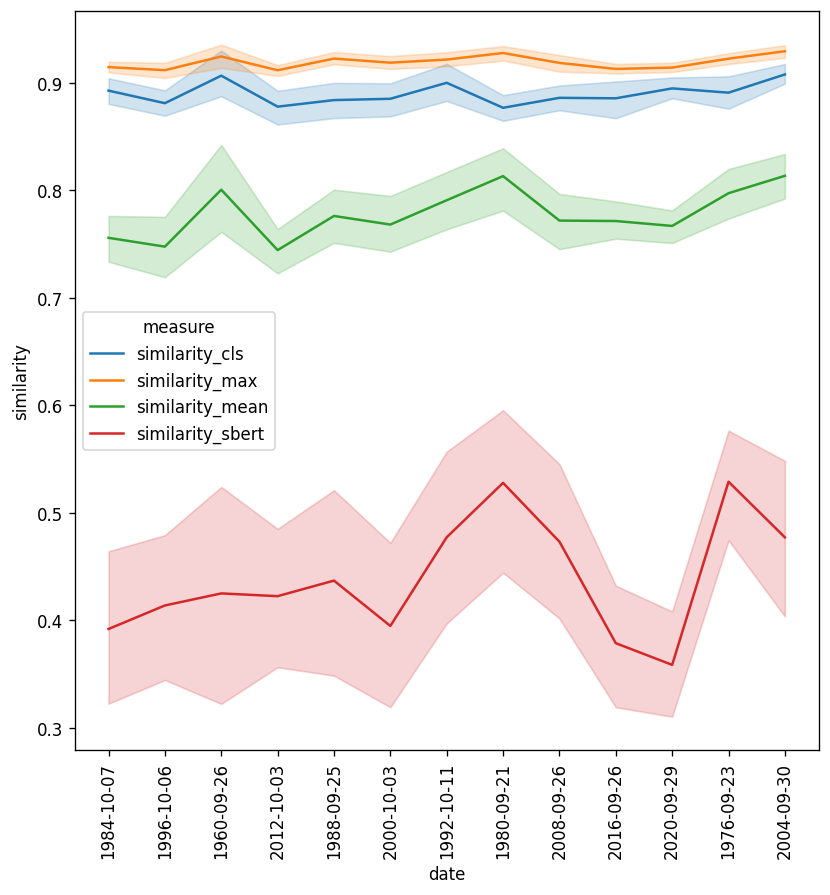

In [212]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(data=df_melted, x="date", y="similarity", hue="measure", ax=ax)
ax.tick_params(axis='x', rotation=90)

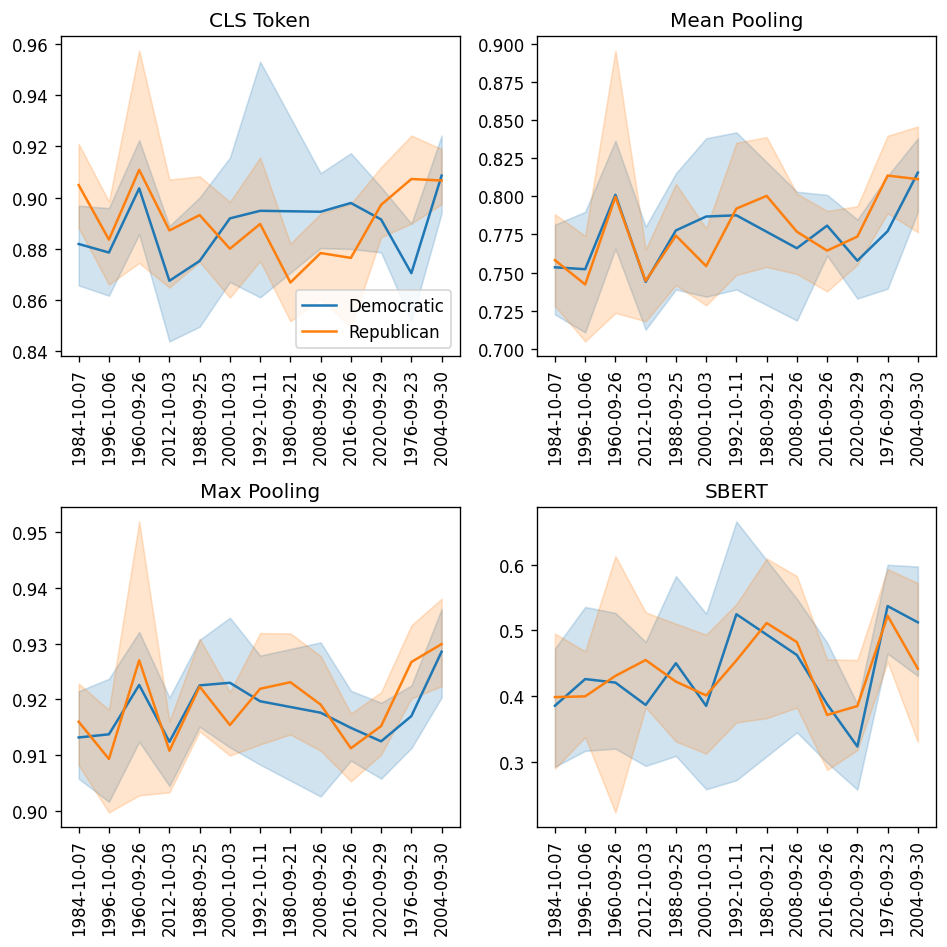

In [213]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.lineplot(data=df[df["party"].isin(["Democratic", "Republican"])], x="date", y="similarity_cls", hue="party", ax=axs[0, 0]).set_title("CLS Token")
axs[0, 0].set_xlabel(None)
axs[0, 0].set_ylabel(None)
axs[0, 0].legend(loc='lower right')
sns.lineplot(data=df[df["party"].isin(["Democratic", "Republican"])], x="date", y="similarity_mean", hue="party", ax=axs[0, 1], legend=False).set_title("Mean Pooling")
axs[0, 1].set_xlabel(None)
axs[0, 1].set_ylabel(None)
sns.lineplot(data=df[df["party"].isin(["Democratic", "Republican"])], x="date", y="similarity_max", hue="party", ax=axs[1, 0], legend=False).set_title("Max Pooling")
axs[1, 0].set_xlabel(None)
axs[1, 0].set_ylabel(None)
sns.lineplot(data=df[df["party"].isin(["Democratic", "Republican"])], x="date", y="similarity_sbert", hue="party", ax=axs[1, 1], legend=False).set_title("SBERT")
axs[1, 1].set_xlabel(None)
axs[1, 1].set_ylabel(None)

for ax in axs:
    for a in ax:
        a.tick_params(axis='x', rotation=90)

fig.tight_layout()

In [214]:
df_filtered[df_filtered["qud_answer_fit"].notnull()]["qud_answer_fit"].mean()

np.float64(2.7286245353159853)

In [215]:
len(df_filtered[df_filtered["qud_answer_fit"] == 3]) / len(
    df_filtered[df_filtered["qud_answer_fit"].notnull()]
), len(df_filtered[df_filtered["qud_answer_fit"] == 2]) / len(
    df_filtered[df_filtered["qud_answer_fit"].notnull()]
), len(
    df_filtered[df_filtered["qud_answer_fit"] == 1]
) / len(
    df_filtered[df_filtered["qud_answer_fit"].notnull()]
)

(0.7732342007434945, 0.1821561338289963, 0.04460966542750929)

In [216]:
df_filtered[df_filtered["qud_answer_fit"] == 1]

speaker  \
1984-10-07 5    Walter Mondale   
           16   Walter Mondale   
           108  Walter Mondale   
           110  Walter Mondale   
1996-10-06 116        Bob Dole   
2012-10-03 170    Barack Obama   
1980-09-21 54    Ronald Reagan   
2016-09-26 199    Donald Trump   
2020-09-29 176    Donald Trump   
           544    Donald Trump   
1976-09-23 17     Jimmy Carter   
2004-09-30 49   George W. Bush   

                                                             text  type  \
1984-10-07 5    One of the key tests of leadership is whether ...  Pres   
           16   Well, I think were getting better all the time...  Pres   
           108  Do you want to give me some suggestions? [Laug...  Pres   
           110  Without any doubt, I have stood up and told th...  Pres   
1996-10-06 116  Let me say first, on the Presidents promise fo...  Pres   
2012-10-03 170    Well, I definitely think there are differences.  Pres   
1980-09-21 54   Miss Quinn, I dont have to. Ive done it. We ha...  Pres   
2016-09-26 199  I do want to say that I was just endorsed— and...  Pres   
2020-09-29 176  If we would've listened to you, the country wo...  Pres   
           544  If you were a certain person, you had no statu...  Pres   
1976-09-23 17   Well, as a matter of fact there is. If we assu...  Pres   
2004-09-30 49   No, what I said was that, because we achieved ...  Pres   

                election_year        date  candidate  \
1984-10-07 5             1984  1984-10-07          1   
           16            1984  1984-10-07          1   
           108           1984  1984-10-07          1   
           110           1984  1984-10-07          1   
1996-10-06 116           1996  1996-10-06          1   
2012-10-03 170           2012  2012-10-03          1   
1980-09-21 54            1980  1980-09-21          1   
2016-09-26 199           2016  2016-09-26          1   
2020-09-29 176           2020  2020-09-29          1   
           544           2020  2020-09-29          1   
1976-09-23 17            1976  1976-09-23          1   
2004-09-30 49            2004  2004-09-30          1   

                                                              qud  \
1984-10-07 5    What should be done to address the significant...   
           16   What is the importance of the President's lead...   
           108  What steps should be taken to address America'...   
           110  How should the $263 billion deficit be address...   
1996-10-06 116  What is the importance of economic reform and ...   
2012-10-03 170    What are the key differences being referred to?   
1980-09-21 54   What evidence supports the assertion that gove...   
2016-09-26 199  What are the implications of recent endorsemen...   
2020-09-29 176  What impact did the decision to close borders ...   
           544  What actions will be taken to address the teac...   
1976-09-23 17   How can we achieve a balanced budget by fiscal...   
2004-09-30 49   What is the importance of maintaining a consis...   

                                                         question  \
1984-10-07 5    Mr. Mondale, the Carter- Mondale administratio...   
           16   You have said, Mr. Mondale, that the polls hav...   
           108  Since we are reaching the end of the question ...   
           110  Follow up in a similar vein, then. What remain...   
1996-10-06 116  Senator Dole, weve talked mostly now about dif...   
2012-10-03 170  Role of government. And it is — you are first ...   
1980-09-21 54   Mr. Anderson, Ill call you for that forecast. ...   
2016-09-26 199  Our next segment is called “Securing America. ...   
2020-09-29 176  So my question to you, is you have refused in ...   
           544  What is radical about racial sensitivity train...   
1976-09-23 17   Uh Governor Carter, you proposed a number of n...   
2004-09-30 49   New question, Mr. President, two minutes. You ...   

                similarity_cls  similarity_max  similarity_mean  \
1984-10-07 5

In [220]:
qud_answer_fit_by_debate = df.groupby("date").agg({"qud_answer_fit": ["mean"]})
qud_answer_fit_by_debate

,qud_answer_fit
,mean
date,
1960-09-26,2.800000
1976-09-23,2.550000
1980-09-21,2.416667
1984-10-07,2.533333
1988-09-25,2.956522
1992-10-11,3.000000
1996-10-06,2.750000
2000-10-03,2.692308
